### Importando as bibliotecas

In [67]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### Analisando os dados do dataset

In [68]:
dados = pd.read_csv("desafio_01_preco_imoveis230209164627-230918-093224.csv")

In [69]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [70]:
dados.shape

(21613, 19)

In [71]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [72]:
dados.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32


### Selecionando as principais variáveis

In [73]:
dados.drop("id", axis=1, inplace=True)

In [74]:
matrix_corr = dados.corr(numeric_only=True).round(4)

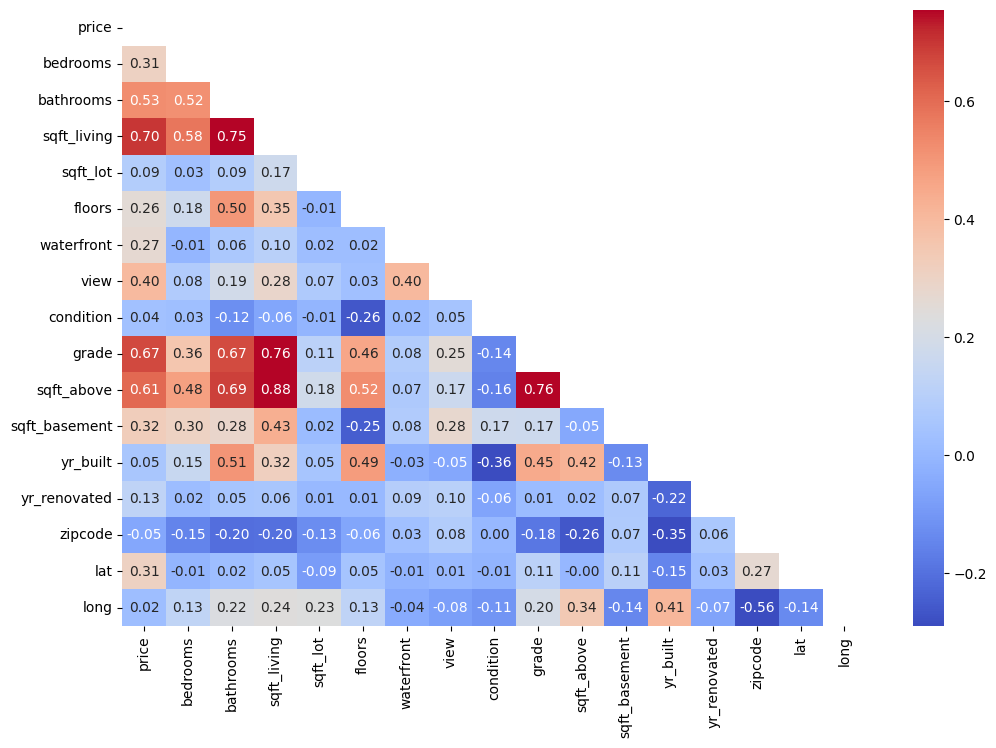

In [75]:
plt.figure(figsize=(12, 8))

mask = np.triu(np.ones_like(matrix_corr, dtype=bool))

sns.heatmap(matrix_corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask, xticklabels=True, robust=True)

plt.show()

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.1, 'Dispersão entre variáveis')

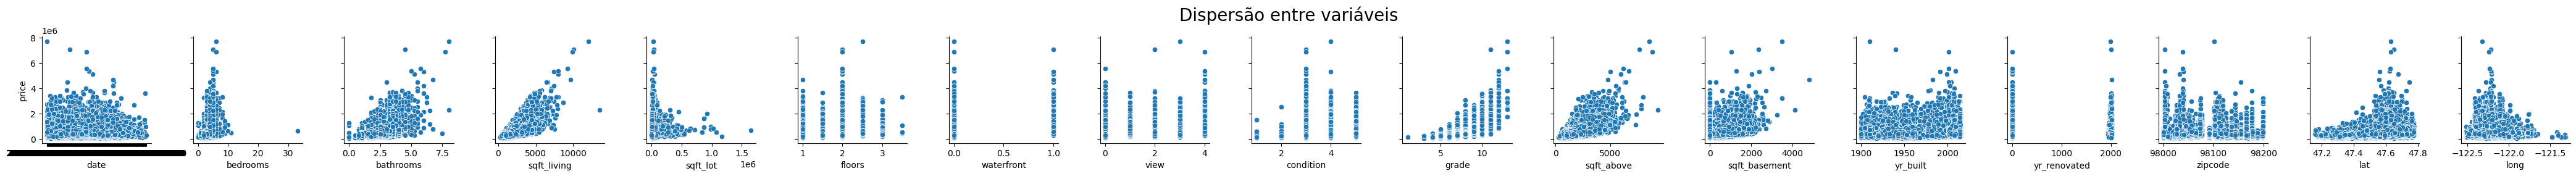

In [76]:
ax = sns.pairplot(dados, y_vars='price', x_vars=dados.drop(['price'], axis=1).columns)
ax.fig.suptitle("Dispersão entre variáveis", fontsize=20, y=1.1)

In [77]:
corr_price = dados.corr(numeric_only=True)['price'].sort_values(ascending=False)[1:]
corr_price

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [78]:
mask = corr_price > 0.20

vars_princ = corr_price[mask]
vars_princ

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
Name: price, dtype: float64

In [79]:
# vars_princ.drop('sqft_living', inplace=True)
# vars_princ.drop('sqft_above', inplace=True)
# vars_princ.drop('floors', inplace=True)
# vars_princ.drop('bathrooms', inplace=True)

# vars_princ.drop('waterfront', inplace=True)
# vars_princ.drop('bedrooms', inplace=True)

In [80]:
vars_princ.index

Index(['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view',
       'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'],
      dtype='object')

### Construindo o modelo de regressão linear multivariada para estimar o preço do imóvel

In [81]:
y = dados.price
y.head(1)

0    221900.0
Name: price, dtype: float64

In [82]:
# X = dados[['grade', 'view', 'sqft_basement', 'lat']]
X = dados[vars_princ.index]
X.head(1)

,sqft_living,grade,sqft_above,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors
0,1180,7,1180,1.0,0,0,3,47.5112,0,1.0


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [84]:
modelo = LinearRegression()

In [85]:
modelo.fit(X_train, y_train)

LinearRegression()

In [86]:
print(f"R² = {modelo.score(X_train, y_train).round(2)}")

R² = 0.66


In [87]:
y_previsto = modelo.predict(X_test)

In [88]:
print(f"R² = {metrics.r2_score(y_test, y_previsto).round(2)}")

R² = 0.66


In [89]:
residuo = y_test - y_previsto
residuo

3490     216263.632710
9720    -173731.262502
11192   -198623.778501
11473    185112.811157
7425     -61576.790558
             ...      
5       -272746.058830
14852   -246596.368458
13073    -22640.861431
20524     45748.136923
19455    -84386.006482
Name: price, Length: 6484, dtype: float64

In [90]:
EQM_2 = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2_2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,4.546045e+10
REQM,2.132146e+05
R²,6.600000e-01


In [91]:
arq = open('modelo_preco_imovel.pkl', 'wb')

pickle.dump(modelo, arq)
arq.close()

In [92]:
X_train.head(1)

,sqft_living,grade,sqft_above,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors
18109,2770,9,2770,2.5,0,0,4,47.5688,0,2.0


In [93]:
y_train.head(1)

18109    711000.0
Name: price, dtype: float64

In [94]:
modelo.predict([X_train.iloc[0].tolist()])[0]

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


741263.1996163838